# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Initialize an empty list to hold the data
data = []

# Iterate over the rows and extract data
for row in rows:
    # Extract all <td> elements in the row
    cols = row.find_all('td')
    # Get the text from each <td> and strip any extra whitespace
    cols = [col.text.strip() for col in cols]
    # Append the extracted data as a list to the data list
    data.append(cols)

# Define the column headings
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=columns)


In [9]:
# Confirm DataFrame was created successfully
df.head(30)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)  # Convert to integer
df['ls'] = df['ls'].astype(int)  # Convert to integer
df['month'] = df['month'].astype(int)  # Convert to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert to float
df['pressure'] = df['pressure'].astype(float)  # Convert to float

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars? Since the months are represented by numbers, finding the max month will give the number of months.
months = df['month'].max()

months

12

In [14]:
# 2. How many sols (Martian days) worth of data are there? 
sols_count = df['sol'].count()
sols_count

1867

In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

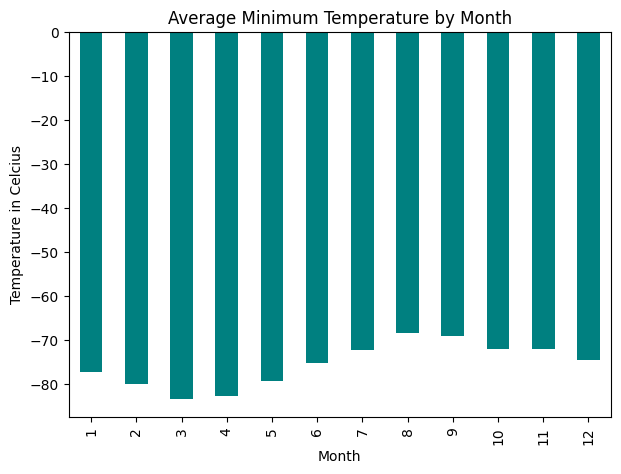

In [16]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', figsize=(7,5), color = 'teal')

# Set title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

# Show the plot
plt.show()

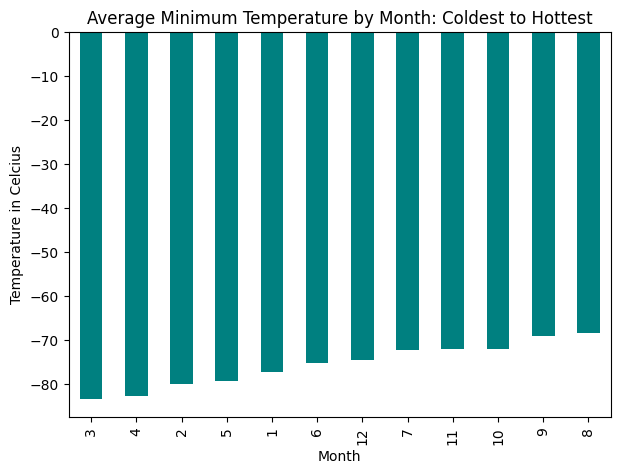

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted =avg_min_temp.sort_values()

# Plot the average minimum temperature by month in descending order
avg_min_temp_sorted.plot(kind='bar', figsize=(7,5), color = 'teal')

# Set title and labels
plt.title('Average Minimum Temperature by Month: Coldest to Hottest')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

# Show the plot
plt.show()

In [18]:
# 4. What is the average pressure by month?
avg_pressure_df = df.groupby('month')['pressure'].mean()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

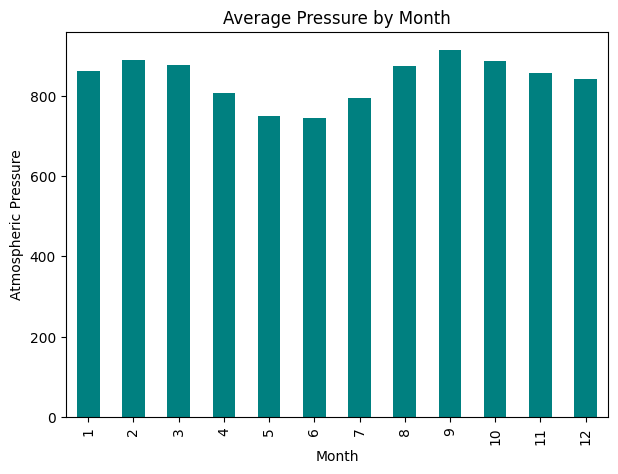

In [19]:
# Plot the average pressure by month
avg_pressure_df.plot(kind='bar', figsize=(7,5), color = 'teal')

# Set title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.show()

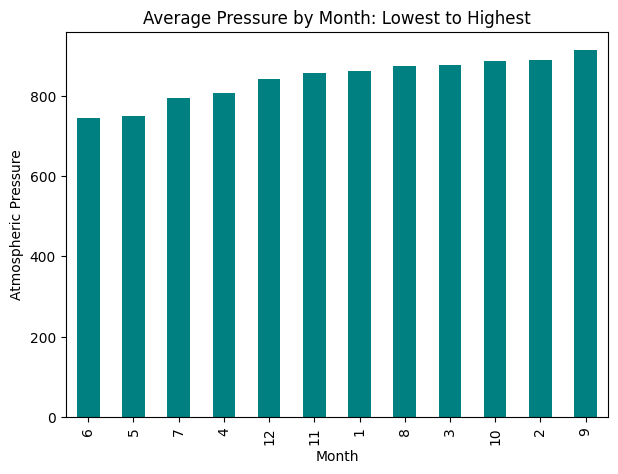

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_df_sorted =avg_pressure_df.sort_values()

avg_pressure_df_sorted.plot(kind='bar', figsize=(7,5), color = 'teal')

# Set title and labels
plt.title('Average Pressure by Month: Lowest to Highest')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.show()


In [21]:
# Examine the terrestrial_date, sol, and month data to better understand the relationship between terrestrial and martian dates
df['terrestrial_date'].max()
df['terrestrial_date'].min()
df['terrestrial_date'].count()
#df['sol'].count()
# df['sol'].value_counts()
df['sol'].max()
#df['sol'].min()
df['month'].value_counts()

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

In [22]:
sols_df = df.groupby('month')['sol'].describe()
sols_df

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,174.0,1077.574713,538.905777,351.0,402.25,1053.5,1704.75,1748.0
2,178.0,1175.853933,531.959230,412.0,473.25,1121.5,1768.75,1814.0
3,192.0,1204.406250,539.242829,477.0,532.75,1182.5,1832.25,1880.0
4,194.0,1244.500000,548.967908,544.0,592.25,1244.5,1896.75,1945.0
5,149.0,1182.691275,505.702186,609.0,646.00,1294.0,1331.00,1977.0
6,147.0,750.829932,525.403412,10.0,50.50,701.0,1351.50,1388.0
7,142.0,715.105634,543.466085,54.0,89.25,743.5,1404.75,1440.0
8,141.0,795.333333,547.943058,104.0,139.00,795.0,1452.00,1487.0
9,134.0,861.186567,544.327400,151.0,184.25,843.5,1499.75,1533.0


In [23]:
df['terrestrial_date'] = range(1, len(df) + 1)  # Start numbering from 1
min_temp_earth_days_df = df.groupby('terrestrial_date')['min_temp'].sum()
min_temp_earth_days_df

terrestrial_date
1      -75.0
2      -76.0
3      -76.0
4      -74.0
5      -74.0
        ... 
1863   -78.0
1864   -77.0
1865   -76.0
1866   -77.0
1867   -77.0
Name: min_temp, Length: 1867, dtype: float64

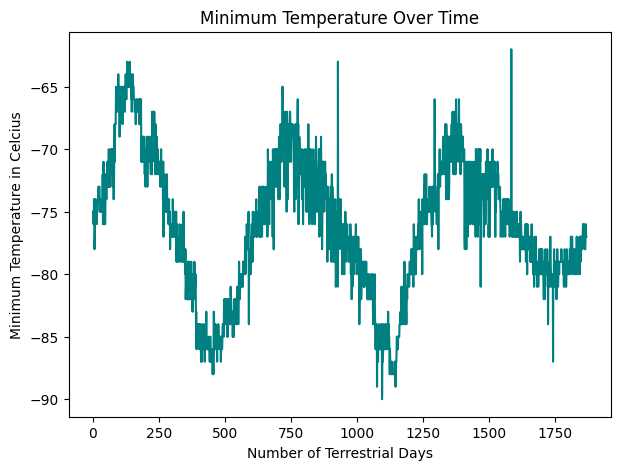

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot the average pressure by month
min_temp_earth_days_df.plot(kind='line', figsize=(7,5), color = 'teal')

# Set title and labels
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature in Celcius')

# Show the plot
plt.show()


#### Minimum Temperature

As shown in the graph entitled 'Average Minimum Temperature by Month: Coldest to Hottest' 
- The coldest month on Mars is month 3. 
- The hottest month on Mars is Month 8.

#### Atmospheric Pressure

The graph entitled 'Average Pressure by Month: Lowest to Highest' shows:
- The lowest average pressure was observed in Martian Month 6. 
- The highest average pressure was observed in Martian Month 9.

#### Year Length

Looking at the graph entitled 'Minimum Temperature Over Time' we observe approximately three cycles of the temperature dataimplying three Martian years of temperature measurements. There are approximately 1900 Terrestrial days shown in the graph during those three cycles. Therefore we can estimate that a Martian year is approximately 633 terrestrial days long. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV 
df.to_csv('mars_weather_output_file.csv', index=False)

In [27]:
browser.quit()